In [1]:
from keras.datasets import mnist
import numpy as np
import requests, gzip, os, hashlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
(x, y), (x_test, y_test) = mnist.load_data()

In [58]:
path = "/content"

In [59]:
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

In [60]:
x = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
x_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [61]:
x = x * 255
x_test = x_test * 255

In [62]:
#Validation split
rand=np.arange(60000)
np.random.seed(50)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

x_train,x_val=x[train_no,:,:],x[val_no,:,:]
y_train,y_val=y[train_no],y[val_no]

In [63]:
def init(x,y):
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
W1=init(28*28,128)
W2=init(128,10)

In [64]:
#Sigmoid funstion
def sigmoid(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [65]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [66]:
#forward and backward pass
def forward_backward_pass(x,y):
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
 
    
    x_W1=x.dot(W1)
    x_sigmoid=sigmoid(x_W1)
    x_W2=x_sigmoid.dot(W2)
    out=softmax(x_W2)
   
 
    error=2*(out-targets)/out.shape[0]*d_softmax(x_W2)
    update_W2=x_sigmoid.T@error
    
    
    error=((W2).dot(error.T)).T*d_sigmoid(x_W1)
    update_W1=x.T@error

    return out,update_W1,update_W2 

In [67]:
epochs=2000
lr=0.5
batch=50000

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs+1):
    sample=np.random.randint(0,x_train.shape[0],size=(batch))
    x=x_train[sample].reshape((-1,28*28))
    y=y_train[sample]
 

    out,update_W1,update_W2=forward_backward_pass(x,y)
  
    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    W1=W1-lr*update_W1
    W2=W2-lr*update_W2
    
    if(i%20==0):    
        x_val=x_val.reshape((-1,28*28))
        val_out=np.argmax(softmax(sigmoid(x_val.dot(W1)).dot(W2)),axis=1)
        val_acc=(val_out==y_val).mean()
        val_accuracies.append(val_acc.item())

    if(i%500==0): 
      print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')


For 0th epoch: train accuracy: 0.097 | validation accuracy:0.093
For 500th epoch: train accuracy: 0.261 | validation accuracy:0.248
For 1000th epoch: train accuracy: 0.398 | validation accuracy:0.386
For 1500th epoch: train accuracy: 0.474 | validation accuracy:0.462
For 2000th epoch: train accuracy: 0.520 | validation accuracy:0.510


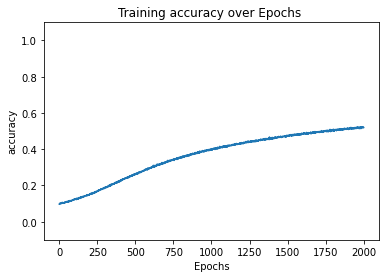

In [68]:
plt.ylim(-0.1, 1.1)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy over Epochs ')
plot(accuracies)

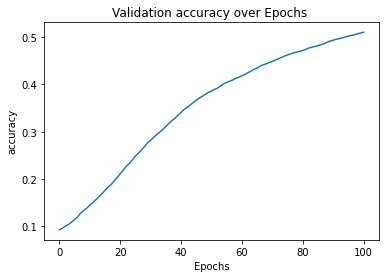

In [69]:
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Validation accuracy over Epochs ')
plot(val_accuracies)

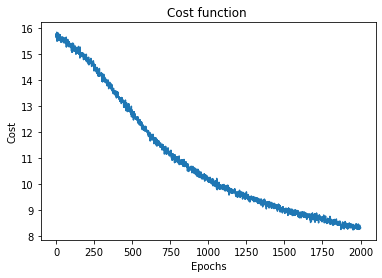

In [70]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost function ')
plot(losses)

In [71]:
test_out=np.argmax(softmax(sigmoid(x_test.dot(W1)).dot(W2)),axis=1)
test_acc=(test_out==y_test).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

Test accuracy = 51.85%


array([0])

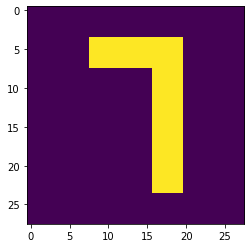

In [ ]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)
imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(W1)).dot(W2),axis=1)
x

array([0])

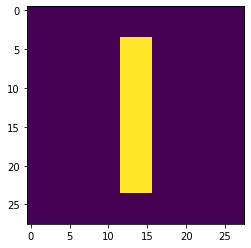

In [ ]:
n = [[0,0,0,0,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,0,0,0,0]]

n = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in n])
n=n.reshape(1,-1)
imshow(n.reshape(28,28))
x = np.argmax(sigmoid(n.dot(W1)).dot(W2),axis=1)
x